In [22]:
from pathlib import Path

import pandas as pd

working_dir = Path("/lustre/scratch125/casm/team113da/projects/FUR/FUR_analysis/FUR_analysis_cat/human_comparison_figure")

In [23]:
# Get a list of the cBioPortal mutation proportion files
cbio_files = list(working_dir.glob("./data/cbioportal_mutation_proportions/*.txt"))

# Create a list of dataframes to store the data
dataframes = []

# Read in the data from each file
for file in cbio_files:
    # Get the cancer type from the filename
    cancer_type = file.stem.split('.')[0]
    # Read in the data
    data = pd.read_csv(file, sep="\t")
    # Add the cancer type to the data
    data["Cancer_Type"] = cancer_type
    # Convert the Freq column to a decimal
    data["Freq"] = data["Freq"].str.replace('<', '').str.replace('>', '').str.rstrip('%').astype(float) / 100
    # Append the data to the dataframe list
    dataframes.append(data)

# Concatenate the dataframes
cbio_combined_df = pd.concat(dataframes)

cbio_combined_df.head()

,Gene,MutSig(Q-value),# Mut,#,Profiled Samples,Freq,Is Cancer Gene (source: OncoKB),Cancer_Type
0,HTR4,NaN,7,7,566,0.012,No,lung_adenocarcinoma
1,CRHBP,NaN,10,10,566,0.018,No,lung_adenocarcinoma
2,HTR6,NaN,14,14,566,0.025,No,lung_adenocarcinoma
3,HTR7,NaN,11,11,566,0.019,No,lung_adenocarcinoma
4,LURAP1L,NaN,3,3,566,0.005,No,lung_adenocarcinoma


In [24]:
# Get a list of the FUR MAF files
fur_mafs = list(working_dir.glob('./data/fur_mafs/*.maf'))

# Create a list of dataframes to store the data
dataframes = []

# Create a dictionary to map study IDs to their respective cancer type
STUDY_ID_TO_CANCER_TYPE_DICT = {
    "6555_2711": "lung_adenocarcinoma",
    "6711_2820": "cSCC",
    "6712_2822": "oSCC",
    "6841_2964": "meningioma",
    "6864_2965": "pancreatic_cancer",
    "6945_3142": "cholangiocarcinoma",
    "6973_2987": "osteosarcoma",
    "6982_3135": "b_cell_lymphoma",
    "6990_3065": "mammary_gland_carcinoma",
    "7040_3064": "basal_cell_carcinoma",
    "7097_3073": "colorectal_carcinoma",
    "7098_3140": "glioma"
}

T_CELL_LYMPHOMA_SAMPLES = ['CATD0572a', 'CATD0574a', 'CATD0575a',
                'CATD0578a', 'CATD0579a', 'CATD0580a', 
                'CATD0581a', 'CATD0585a', 'CATD0587a',
                'CATD0588a', 'CATD0592a', 'CATD0593a',
                'CATD0596a', 'CATD0598a', 'CATD0601a',
                'CATD0603a', 'CATD0606a', 'CATD0608a',
                'CATD0610a', 'CATD0678a', 'CATD0679a',
                'CATD0680a', 'CATD0682a', 'CATD0683a', 
                'CATD0684a', 'CATD0687a', 'CATD0721a',
                'CATD0722a', 'CATD0724a']


# Read in the data from each file
for file in fur_mafs:
    # Get the study ID from the file name
    study_id = file.stem.split('.')[0].split('matched_')[1]
    # Skip the studies that are not in cBioPortal
    if study_id == '6713_2821':
        continue
    # Translate the study ID into a cancer type
    cancer_type = STUDY_ID_TO_CANCER_TYPE_DICT.get(study_id)
    # Read in the data
    df = pd.read_csv(file, sep='\t')
    # Add the cancer type to the data
    df['Cancer_type'] = cancer_type
    # If this is the lymphoma cohort, drop the t-cell samples
    if cancer_type == "lymphoma":
        df = df[~df["Sanger_DNA_ID"].isin(T_CELL_LYMPHOMA_SAMPLES)]
    # Append the dataframe to the dataframe list
    dataframes.append(df)

# Combine the dataframes
fur_combined_df = pd.concat(dataframes)

fur_combined_df.head() 

,Hugo_Symbol,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele2,...,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SIFT,DOMAINS,HGVS_OFFSET,99_Lives,99_Lives_AF,Added_By_MAF_Updater,Cancer_type
0,LATS2,Sanger,Felis_catus_9.0,A1,1998868,1998869,Frame_Shift_Ins,INS,-,G,...,-,-,ENSFCAP00000060376,-,PANTHER:PTHR24356:SF149&PANTHER:PTHR24356,-,-,-,False,basal_cell_carcinoma
1,RB1,Sanger,Felis_catus_9.0,A1,22950095,22950095,Nonsense_Mutation,SNP,C,T,...,-,-,ENSFCAP00000024610,-,PANTHER:PTHR13742:SF17&PANTHER:PTHR13742&Pfam:...,-,-,-,False,basal_cell_carcinoma
2,RB1,Sanger,Felis_catus_9.0,A1,22979662,22979662,Missense_Mutation,SNP,T,C,...,-,-,ENSFCAP00000024610,0.39,PANTHER:PTHR13742:SF17&PANTHER:PTHR13742&Gene3...,-,-,-,False,basal_cell_carcinoma
3,IRS2,Sanger,Felis_catus_9.0,A1,79837830,79837830,Silent,SNP,G,A,...,-,-,ENSFCAP00000046973,-,PANTHER:PTHR10614&PANTHER:PTHR10614:SF7,-,-,-,False,basal_cell_carcinoma
4,IRS2,Sanger,Felis_catus_9.0,A1,79840524,79840532,In_Frame_Del,DEL,GCCGCCGCC,-,...,-,-,ENSFCAP00000046973,-,PANTHER:PTHR10614&PANTHER:PTHR10614:SF7&MobiDB...,-,-,-,False,basal_cell_carcinoma


In [25]:
def calculate_mutation_proportion_from_maf_df(df):
    """
    Calculate the proportion of samples with a mutation in each gene across each cancer type.

    Parameters:
        df (pd.DataFrame): DataFrame containing mutation data.
            It must include 'Hugo_Symbol', 'Cancer_type', and 'Tumor_Sample_Barcode'.

    Returns:
        pd.DataFrame: A DataFrame with columns 'Gene', 'Cancer_Type', 'Proportion'.
    """
    # Check if required columns exist
    required_columns = {'Hugo_Symbol', 'Cancer_type', 'Tumor_Sample_Barcode', 'Gene'}
    assert required_columns.issubset(df.columns), f"Missing required columns: {required_columns - set(df.columns)}"

    # Use 'Gene' column if 'Hugo_Symbol' is '-'
    df['Gene_Final'] = df['Hugo_Symbol'].where(df['Hugo_Symbol'] != '-', df['Gene'])

    # Count the total number of unique samples per cancer type
    total_samples_per_cancer = df.groupby('Cancer_type')['Tumor_Sample_Barcode'].nunique()

    # Count the number of unique samples with mutations for each gene in each cancer type
    mutated_samples = df.groupby(['Gene_Final', 'Cancer_type'])['Tumor_Sample_Barcode'].nunique()

    # Calculate the proportion of mutated samples
    proportions = mutated_samples / total_samples_per_cancer

    # Reset the index and prepare the final DataFrame
    result = proportions.reset_index()
    result.columns = ['Gene', 'Cancer_Type', 'Proportion']

    return result

In [26]:
fur_mutation_proportion_df = calculate_mutation_proportion_from_maf_df(fur_combined_df)

fur_mutation_proportion_df.head()


,Gene,Cancer_Type,Proportion
0,ABI1,cSCC,0.033333
1,ABI1,cholangiocarcinoma,0.035714
2,ABI1,mammary_gland_carcinoma,0.021739
3,ABL1,b_cell_lymphoma,0.020833
4,ABL1,cSCC,0.266667


In [27]:
# Find the common genes between the two datasets
common_genes = set(cbio_combined_df['Gene']).intersection(set(fur_mutation_proportion_df['Gene']))

# Filter the dataframes to only include the common genes
cbio_filtered_df = cbio_combined_df[cbio_combined_df['Gene'].isin(common_genes)]
fur_filtered_df = fur_mutation_proportion_df[fur_mutation_proportion_df['Gene'].isin(common_genes)]

# Merge the dataframes on 'Gene' and 'Cancer_Type'
comparison_df = pd.merge(cbio_filtered_df, fur_filtered_df, on=['Gene', 'Cancer_Type'], suffixes=('_cbio', '_fur'))

# Create a new dataframe that only contains the proportions from each dataset for the matching genes
proportion_comparison_df = comparison_df[['Gene', 'Cancer_Type', 'Freq', 'Proportion']]

# Rename the columns for clarity
proportion_comparison_df.columns = ['Gene', 'Cancer_Type', 'Proportion_cbio', 'Proportion_fur']

# Display the new dataframe
proportion_comparison_df.head()

,Gene,Cancer_Type,Proportion_cbio,Proportion_fur
0,ETAA1,lung_adenocarcinoma,0.007,0.035088
1,INPPL1,lung_adenocarcinoma,0.023,0.017544
2,ATP6AP1,lung_adenocarcinoma,0.009,0.017544
3,ELF3,lung_adenocarcinoma,0.014,0.017544
4,CBL,lung_adenocarcinoma,0.016,0.017544


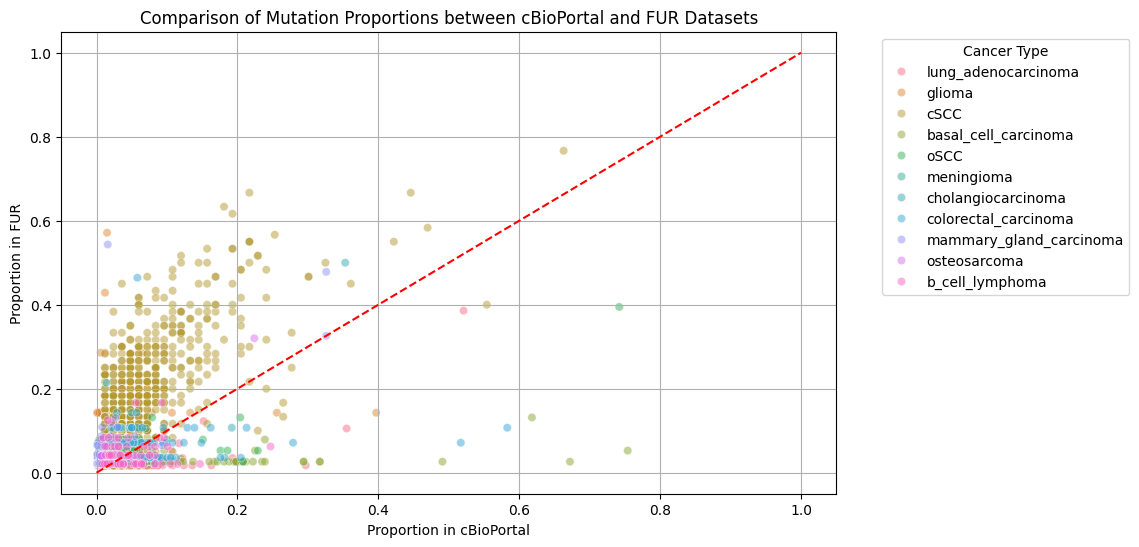

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to compare the mutation proportions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=proportion_comparison_df, x='Proportion_cbio', y='Proportion_fur', hue='Cancer_Type', alpha=0.5)

# Add a line for x = y
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('Proportion in cBioPortal')
plt.ylabel('Proportion in FUR')
plt.title('Comparison of Mutation Proportions between cBioPortal and FUR Datasets')
plt.grid(True)
plt.legend(title='Cancer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

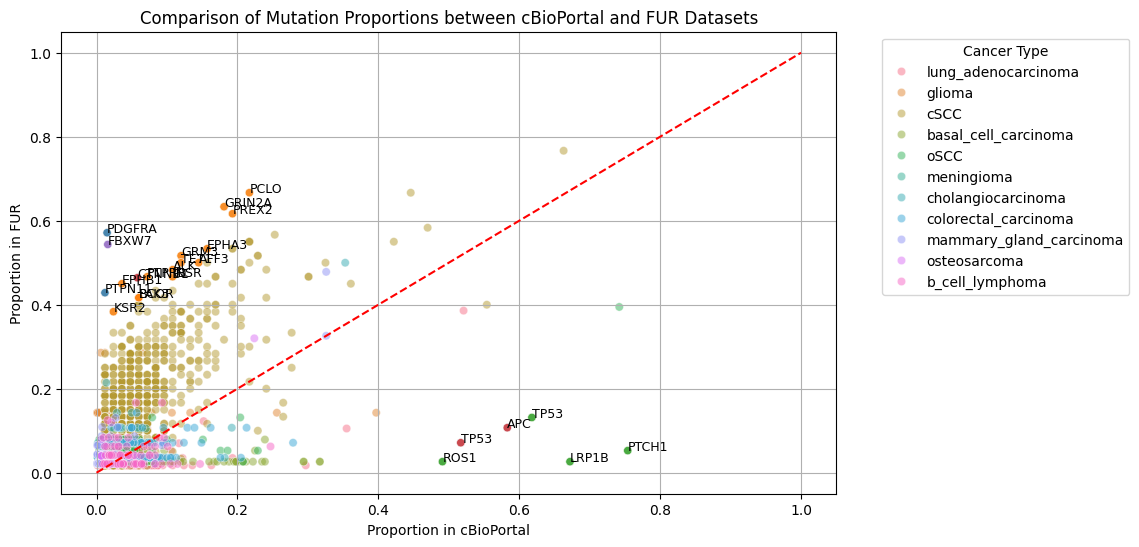

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a threshold for significant difference
significance_threshold = 0.35

# Create a scatter plot to compare the mutation proportions
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=proportion_comparison_df, x='Proportion_cbio', y='Proportion_fur', hue='Cancer_Type', alpha=0.5)

# Add a line for x = y
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Highlight significant points
significant_points = proportion_comparison_df[abs(proportion_comparison_df['Proportion_cbio'] - proportion_comparison_df['Proportion_fur']) > significance_threshold]
sns.scatterplot(data=significant_points, x='Proportion_cbio', y='Proportion_fur', hue='Cancer_Type', alpha=0.8, legend=False)

# Annotate the significant points
for i in range(len(significant_points)):
    row = significant_points.iloc[i]
    plt.text(row['Proportion_cbio'], row['Proportion_fur'], row['Gene'], fontsize=9)

plt.xlabel('Proportion in cBioPortal')
plt.ylabel('Proportion in FUR')
plt.title('Comparison of Mutation Proportions between cBioPortal and FUR Datasets')
plt.grid(True)
plt.legend(title='Cancer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
